# Analyse des données de citrouille

In [1]:
#On importe le fichier csv, et on affiche les premières données
import pandas as pd
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
#On calcul la somme de données manquantes dans notre jeu de données
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [3]:
#On rename nos colonnes
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

## Determination du prix moyen des citrouilles

In [4]:
#On calcul la moyenne des nos citrouilles dans un mois donné

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month


In [5]:
#On ajouter nos données dans un nouveau jeu de données
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})


In [6]:
#On ajoute un filtre de manière à voir uniquement les brushels
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.00,15.0
71,1 1/9 bushel cartons,9/24/16,18.00,18.0
72,1 1/9 bushel cartons,10/1/16,18.00,18.0
73,1 1/9 bushel cartons,10/1/16,17.00,17.0
74,1 1/9 bushel cartons,10/8/16,15.00,15.0
...,...,...,...,...
1738,1/2 bushel cartons,9/30/16,15.00,15.0
1739,1/2 bushel cartons,9/30/16,13.75,15.0
1740,1/2 bushel cartons,9/30/16,10.75,15.0
1741,1/2 bushel cartons,9/30/16,12.00,12.0


In [7]:
#On normalise nos données de manière à appliquer un prix équivalent sur nos citrouilles

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)


## Visualisation des données

In [8]:
import matplotlib.pyplot as plt

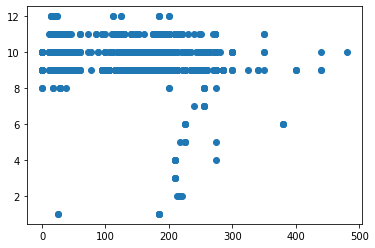

In [9]:
#On retourne nos données dans matplotlib
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()
#Cela ne nous interesse pas car il est difficile de lire à travers ce graph

Text(0, 0.5, 'Pumpkin Price')

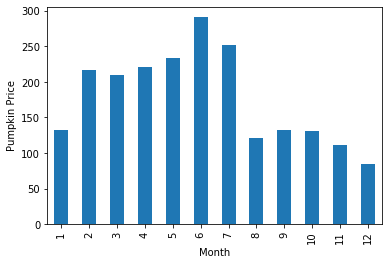

In [10]:
#On plot sous forme d'un diagramme à barres
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [12]:
#On convertit automatiquement nos données string en nombres :

from sklearn.preprocessing import LabelEncoder

new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)

In [13]:
new_pumpkins

,Month,Package,Low Price,High Price,Price
0,3,5,82,78,275.00
1,4,5,82,78,275.00
2,8,5,63,58,160.00
3,8,5,63,58,160.00
4,10,5,46,46,95.00
...,...,...,...,...,...
1752,8,4,9,9,14.75
1753,8,7,83,77,275.00
1754,8,7,83,77,275.00
1755,8,7,83,77,275.00


In [16]:
#On cherche ici la corrélation entre le package et les prix
print(new_pumpkins['Package'].corr(new_pumpkins['Price']))
#Nous reste à déterminer quel est le prix pour un package donné ? 

0.36376740942454433


### Création de model linéaire

In [17]:
#Première chose à faire, on supprime les données manquantes
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1757 entries, 0 to 1756
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       1757 non-null   int64  
 1   Package     1757 non-null   int64  
 2   Low Price   1757 non-null   int64  
 3   High Price  1757 non-null   int64  
 4   Price       1757 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 82.4 KB


In [18]:
#On créer un nouveau jeu de données réduit
new_columns = ['Package', 'Price']
lin_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

lin_pumpkins

,Package,Price
0,5,275.00
1,5,275.00
2,5,160.00
3,5,160.00
4,5,95.00
...,...,...
1752,4,14.75
1753,7,275.00
1754,7,275.00
1755,7,275.00


In [20]:
#On assigne nos x et nos y
X = lin_pumpkins.values[:, :1]
y = lin_pumpkins.values[:, 1:2]

In [21]:
#On créer notre model linéaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

accuracy_score = lin_reg.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.15670291028939265


Ici, l'accuracy n'est pas très bonne en raison de la faible corrélation entre nos package et nos prix.

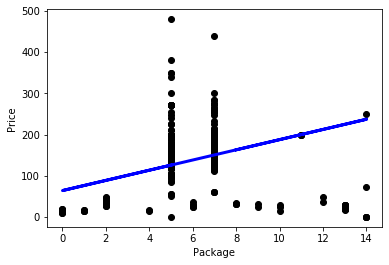

In [23]:
#On trace la ligne qui représente la corrélation entre prix et package.
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xlabel('Package')
plt.ylabel('Price')

plt.show()

In [26]:
#On test le model avec une variété hypotétique.
import numpy as np
lin_reg.predict( np.array([ [2.75] ]) )

array([[98.1715447]])